<a href="https://colab.research.google.com/github/markliyx/Is-Your-Company-Going-Bankrupt/blob/main/Final_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Is Your Company Heading to Bankruptcy?**

###**---A Study of Bankruptcy Prediction**

**Annotated Notebook**

**Final Project By Zihan Chen, Yixiao (Mark) Li, and Zhenqi Ni**

**CIS545 Spring 2021**

## Introduction

In this project, we explore and examine a dataset about bankruptcy prediction of Polish companies. First found on Kaggle, this dataset is directly from the Machine Learning Repository of University of California, Irvine. The link to the dataset is https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data#.

The data was originally collected from Emerging Markets Information Service (https://www.emis.com/), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.

Our objective is to provide insight to finding important factors that can help predict company bankruptcies more accurately through our exploration and analysis of this particular dataset.

Without further ado, let's dive into our data.

## Setup, Imports, and Data Loading

First off, we finish our setup, import the necessary libraries, and read the dataset into Python.

The original data set is composed of 5 separate arrf files, and we have pre-processed them to produced a single csv file. We also replaced the NAs with the mean value of the column. 

We first check the types of each column. It seems that every column of our dataframe is numerical, and ready to be fed into regressions, trees, and other models.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as smf
import sklearn
import plotly.express as px
from sklearn import tree
from sklearn.model_selection import train_test_split

#bankrupt_data = pd.read_csv('/content/drive/MyDrive/CIS545/CIS545 Final Project/bankrupt.csv').drop(['Unnamed: 0'], axis = 1)
bankrupt_data = pd.read_csv('bankrupt.csv').drop(['Unnamed: 0'], axis = 1)

bankrupt_data

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,0.249760,0.659800,0.166600,0.249760,497.42,0.733780,2.63490,0.249760,0.149420,43.3700,1.247900,0.214020,0.119980,0.477060,0.504940,0.604110,1.458200,1.761500,5.9443,0.11788,0.149420,94.140,3.8772,0.56393,0.214020,1.74100,593.270000,0.50591,0.128040,0.662950,0.051402,0.128040,114.420,71.0500,1.00970,1.52250,49.394,0.185300,0.110850,2.04200,0.37854,0.25792,2.24370,2.24800,348690.00,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,0.261140,0.516800,0.158350,0.258340,677.96,0.538380,2.00050,0.258340,0.152000,87.9810,1.429300,0.248060,0.123040,0.270012,0.395420,0.439920,88.444000,16.946000,3.6884,0.26969,0.152000,122.170,2.9876,2.98760,0.206160,1.69960,105.085363,0.49788,0.121300,0.086422,0.064371,0.145950,199.490,111.5100,0.51045,1.12520,100.130,0.237270,0.139610,1.94470,0.49988,0.33472,17.86600,17.86600,2304.60,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,0.312580,0.641840,0.244350,0.309060,794.16,0.459610,1.43690,0.309060,0.236100,73.1330,1.428300,0.302600,0.189960,0.270012,0.289320,0.372820,86.011000,1.062700,4.3749,0.41929,0.238150,176.930,2.0630,1.42740,0.315650,1.30900,2.301900,0.51537,0.241140,0.322020,0.074020,0.231170,165.510,92.3810,0.94807,1.01010,96.372,0.291810,0.222930,1.07580,0.48152,0.48474,1.20980,2.05040,6332.70,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,0.092704,0.301630,0.094257,0.092704,917.01,0.398030,3.25370,0.092704,0.071428,79.7880,1.506900,0.115500,0.062782,0.171930,0.573530,0.361520,0.940760,1.961800,4.6511,0.14343,0.071428,91.370,3.9948,0.37581,0.115500,1.35620,105.085363,0.57353,0.088995,0.401390,0.069622,0.088995,180.770,100.9800,0.28720,1.56960,84.344,0.085874,0.066165,2.49280,0.30734,0.25033,2.45240,2.45240,20545.00,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,0.187320,0.331470,0.121820,0.187320,1133.20,0.322110,1.63070,0.187320,0.115530,57.0450,3.884997,0.198320,0.115530,0.187320,0.386770,0.322110,1.413800,1.118400,4.1424,0.27884,0.115530,147.040,2.4823,0.32340,0.198320,1.62780,11.247000,0.43489,0.122310,0.293040,0.096680,0.122310,141.620,84.5740,0.73919,0.95787,65.936,0.188110,0.116010,1.29590,0.56511,0.40285,1.88390,2.11840,3186.60,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,0.041583,0.061959,0.023622,0.013981,6507.60,0.056089,1.41600,0.013981,0.008338,27.0920,1.033000,0.040401,0.007692,0.901840,0.083706,0.054556,1.463700,0.052831,4.9667,0.41853,0.024762,50.128,7.4000,2.36440,0.033819,1.67680,0.378500,0.66377,0.020169,0.022858,0.356510,0.024093,56.452,29.3600,0.10363,0.62061,27.207,0.014771,0.008809,0.37454,0.22564,0.13514,0.39944,0.90248,3599.10,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
43401,-0.578050,0.96702,-0

In [ ]:
bankrupt_data.dtypes

Attr1       float64
Attr2       float64
Attr3       float64
Attr4       float64
Attr5       float64
             ...   
Attr61      float64
Attr62      float64
Attr63      float64
Attr64      float64
bankrupt      int64
Length: 65, dtype: object

# Exploratory Data Analysis
First off, we count how many bankruptcies there are in out dataset. And the result is that out of all 43405 companies, we have 2091 bankruptcies.

In [ ]:
# count the number of bankrupt and non-bankrupt companies
bankrupt_data[['Attr1','bankrupt']].groupby(['bankrupt']).count()

,Attr1
bankrupt,
0,41314
1,2091


The next thing we are interested in is the size of our companies, because our basic knowledge of corporate finance tells us that all these financial metrics mean different things to companies of different sizes. Plus, we wish to see whether bankrupt companies tend to be of some particular size.

In order to accomplish this, the attribute we look to is Attr29, that is the logarithm of total assets.

And the plot below tells us that the absolute majority of that data falls in the region between 2 and 6. The variance is relatively moderate. There are some outliers on the lower side though.

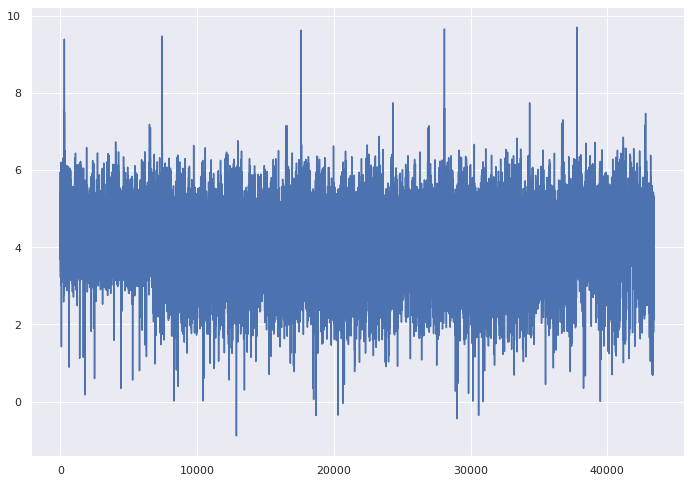

In [ ]:
from matplotlib import pyplot as plt
plt.plot(bankrupt_data[['Attr29']])

Then we highlight the sizes of the bankrupt companies we have. However, we discover that there is nothing speical that is visible about the sizes of these companies.

As a matter of fact, the sizes of bankrupt companies have a smaller variance and basically no outliers.

Hence, we obtained no concrete conclusion from observing this attribute alone. We proceed.

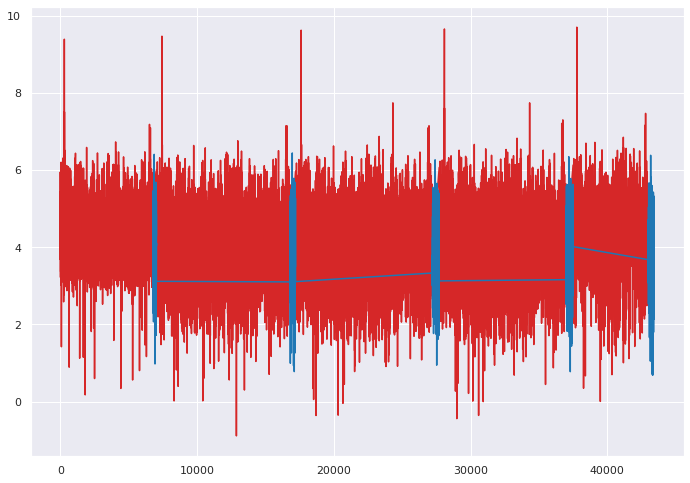

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(bankrupt_data.loc[bankrupt_data['bankrupt'] == 0, 'Attr29'], color='tab:red')
ax1.plot(bankrupt_data.loc[bankrupt_data['bankrupt'] == 1, 'Attr29'], color='tab:blue')
plt.show()

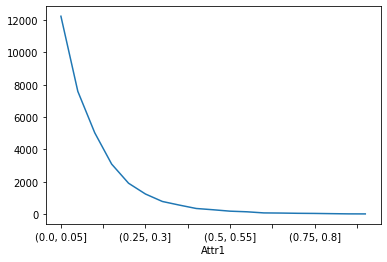

In [ ]:
bankrupt_data['Attr1'].groupby(pd.cut(bankrupt_data['Attr1'], np.arange(0, 1, 0.05))).count().plot()

Next, we compute and plot the correlation matrix of the features of our dataset in the form of a heatmap. We can see there exist some really negatively correlated features in our dataset, as shown by the very deep and blue squares. But overall, the correlations are not very high.

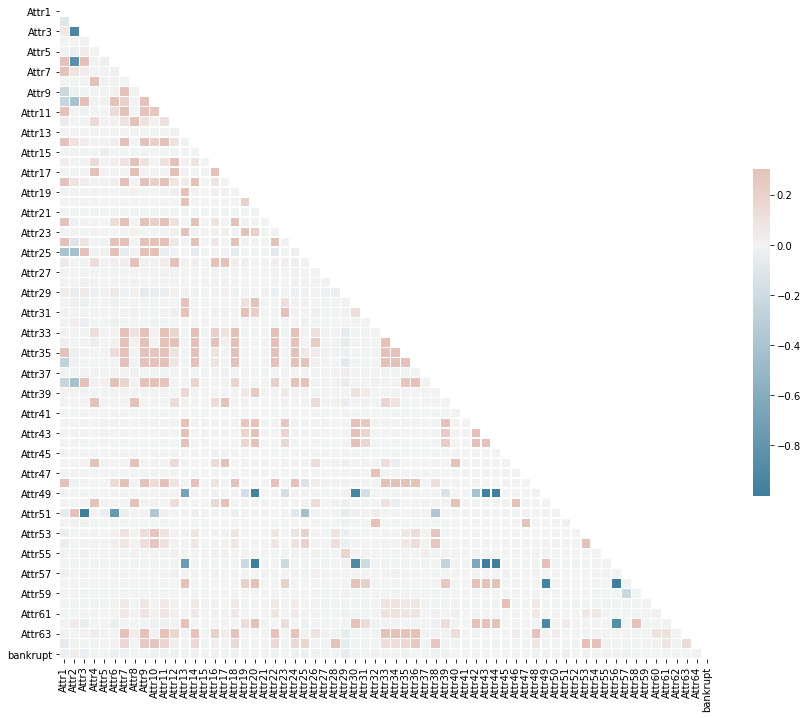

In [ ]:
new_data = bankrupt_data
corr = new_data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15, 12))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# find out the top 10 positively correlated features 
s = corr.unstack()
sorted = s.sort_values(ascending=False)
sorted = sorted.loc[sorted != 1]
sorted.drop_duplicates().head(10)

Attr7   Attr14    1.000000
Attr4   Attr46    0.999920
Attr17  Attr8     0.999588
Attr23  Attr19    0.999290
Attr19  Attr31    0.999201
Attr43  Attr44    0.999132
Attr38  Attr10    0.998974
Attr54  Attr53    0.998697
Attr31  Attr23    0.998492
Attr58  Attr20    0.998139
dtype: float64

As we can see, there exists quite a few rather high correlations between our features. But these can mostly be explained by the fact that these features are financial metrics and ratios and many of them describe essentially the same things. For example, Attr7 is EBIT / total assets while Attr14 is (gross profit + interest) / total assets. Given EBIT stands for Earnings Before Interest and Taxes, Attr14 is essentially a function of Attr7. That explains the correlation of 1.

In [ ]:
# find out the top 10 negatively correlated features
s = corr.unstack()
sorted = s.sort_values(ascending=True)
sorted.drop_duplicates().head(10)

Attr56  Attr20   -0.999880
        Attr58   -0.998221
Attr51  Attr3    -0.998219
Attr43  Attr56   -0.992552
Attr56  Attr44   -0.986657
Attr49  Attr44   -0.975099
Attr43  Attr49   -0.973587
Attr20  Attr49   -0.959395
Attr58  Attr49   -0.956988
Attr30  Attr49   -0.948070
dtype: float64

We can see some rather negative correlations in our features as well. The reasoning is actually quite similar. For example, given Attr56 is (sales - cost of products sold) / sales and Attr20 is (inventory * 365) / sales, it is rather intuitive why they would be going basically in the opposite direction.

Here, it is worth noting that Attr49 EBITDA (profit on operating activities - depreciation) / sales stands out in particular for being highly negatively correlated with 5 other variables.
 

After conducting these basic exploratory analysis on our data, we did some Internet searches for similar studies on the subject that can potentially give us some inspirations on our next steps. And the concept of Altman Z-Score popped up and became much of our interest in that this concept, or model, directly addresses the exact problem we are looking into.

## Altman Z-Score
In 1968, Dr. Ed Altman, then a finance professor at NYU, developed a simple formula to determine the risk of companies going bankrupt. He named it the Z-score and it is calculated as follows:



> Z-Score = 1.2A + 1.4B + 3.3C + 0.6D + 1.0E

Where:

*   A = working capital / total assets
*   B = retained earnings / total assets
*   C = earnings before interest and tax / total assets
*   D = market value of equity / total liabilities
*   E = sales / total assets

According to Altman, if a company's Z-Score is below 1.8, then the probability of it going bankrupt would be quite high. Let's see how his model performs.

Before conducting any computation, we make a few plots of these five attributes that the model employs to get a sense of the data that we are dealing with here.

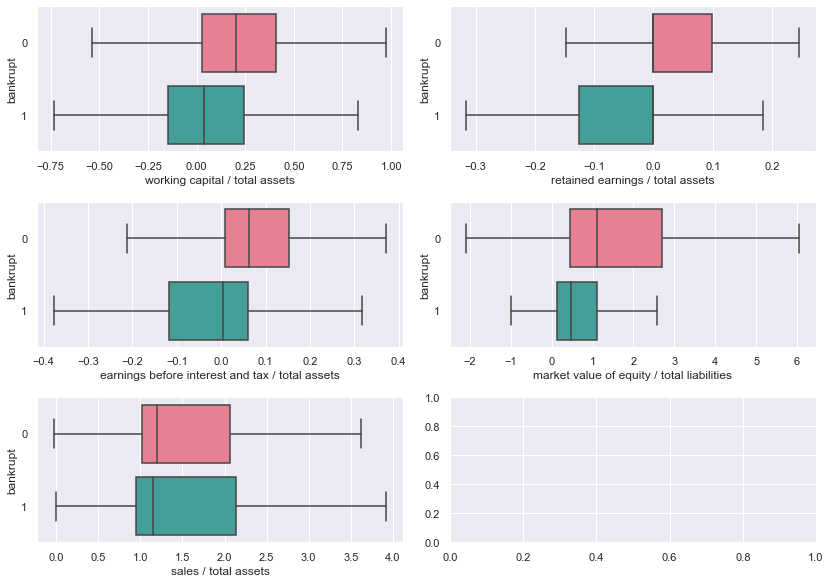

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
bankrupt_raw_data = d.read_csv('bankrupt_raw.csv').drop(['Unnamed: 0'], axis = 1)
plot_data = bankrupt_raw_data[['Attr3','Attr6','Attr7','Attr8','Attr9','bankrupt']]
plot_data = plot_data.rename({'Attr3': 'working capital / total assets', 
                              'Attr6': 'retained earnings / total assets',
                              'Attr7': 'earnings before interest and tax / total assets',
                              'Attr8': 'market value of equity / total liabilities',
                              'Attr9': 'sales / total assets'}, axis=1)

fig, axs = plt.subplots(3,2)
sns.boxplot(x = "working capital / total assets", y = 'bankrupt', data = plot_data,  palette = "husl", showfliers = False, ax=axs[0][0])
sns.boxplot(x = "retained earnings / total assets", y = 'bankrupt', data = plot_data, palette = "husl", showfliers = False, ax=axs[0][1])
sns.boxplot(x = "earnings before interest and tax / total assets", y = 'bankrupt', data = plot_data, palette = "husl", showfliers = False, ax=axs[1][0])
sns.boxplot(x = "market value of equity / total liabilities", y = 'bankrupt', data = plot_data, palette = "husl", showfliers = False, ax=axs[1][1])
sns.boxplot(x = "sales / total assets", y = 'bankrupt', data = plot_data, palette = "husl", showfliers = False, ax=axs[2][0])
fig.tight_layout()

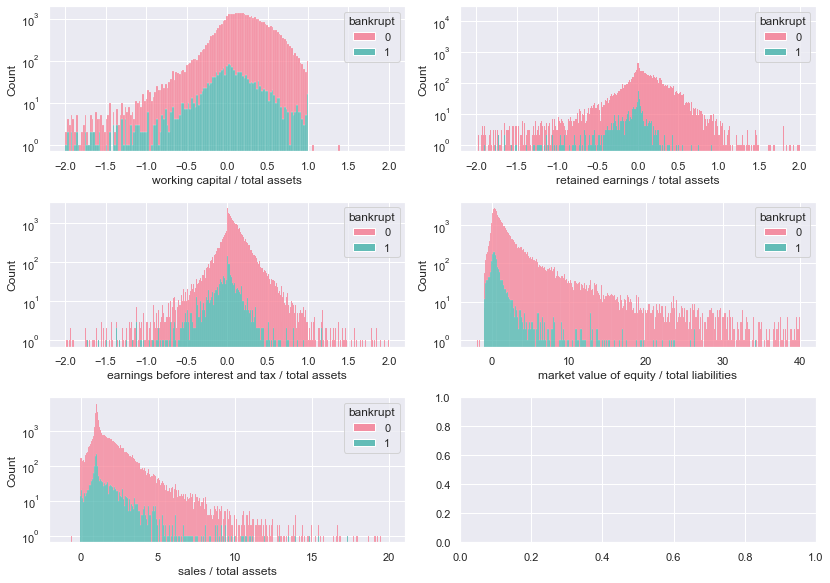

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, axs = plt.subplots(3,2)
sns.histplot(data=plot_data, x = "working capital / total assets", hue='bankrupt',palette = "husl", multiple="stack", binrange = (-2, 2), log_scale=(False, True),ax=axs[0][0])
sns.histplot(data=plot_data, x = "retained earnings / total assets", hue='bankrupt',palette = "husl", multiple="stack", binrange = (-2, 2), log_scale=(False, True),ax=axs[0][1])
sns.histplot(data=plot_data, x = "earnings before interest and tax / total assets", hue='bankrupt',palette = "husl", multiple="stack", binrange = (-2, 2), log_scale=(False, True),ax=axs[1][0])
sns.histplot(data=plot_data, x = "market value of equity / total liabilities", hue='bankrupt',palette = "husl", multiple="stack", binrange = (-2, 40), log_scale=(False, True),ax=axs[1][1])
sns.histplot(data=plot_data, x = "sales / total assets", hue='bankrupt',palette = "husl", multiple="stack", binrange = (-1, 20), log_scale=(False, True),ax=axs[2][0])

fig.tight_layout()




In the graphs above, we plotted the five variables for companies that went into bankruptcy and those that haven't separately. And some patterns are can be recognized.

In the histograms, we can see that the distributions of the five metrics of bankrupt companies are mostly of very similar shape as those of the non-bankrupt companies.

And the box plots demonstrate that the mean values of all five variables of the non-bankrupt companies are higher than those of the bankrupt companies while the spreads of the metrics vary.

In [ ]:
bankrupt_data_z = bankrupt_data
bankrupt_data_z["Altman"] = 1.2*bankrupt_data_z["Attr3"] + 1.4*bankrupt_data_z["Attr6"] + 3.3*bankrupt_data_z["Attr7"] + 0.6*bankrupt_data_z["Attr8"] + 1.0*bankrupt_data_z["Attr9"]
bankrupt_data_z["Pred"] = (bankrupt_data_z["Altman"] <= 1.8)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(bankrupt_data_z["bankrupt"], bankrupt_data_z["Pred"])
print("Test Accuracy is:" + str(accuracy))

print(sklearn.metrics.classification_report(bankrupt_data_z["bankrupt"],bankrupt_data_z["Pred"]))


Test Accuracy is:0.7570556387512959
              precision    recall  f1-score   support

           0       0.97      0.77      0.86     41314
           1       0.10      0.49      0.16      2091

    accuracy                           0.76     43405
   macro avg       0.53      0.63      0.51     43405
weighted avg       0.93      0.76      0.82     43405



His formula works fairly well in the sense that it correctly clasified about 50% of the companies that would go bankrupt in 5 years in our dataset, even though it also mistakenly predicted 23% of the non-bankrupt companies would also go bankrupt. Given its simplicity and intuitiveness, Altman's model could serve as a quick shot at the problem when needded.

## Our Z-Score
With the inspiration from Dr. Altman, we decided to formulate a simple formula ourselves, using what we learned in CIS 545. We first run a logistic regression on the whole data set with L1 regularization to find the most significant contributers of bankrupcy.

In [ ]:
from sklearn.model_selection import train_test_split

label = bankrupt_data['bankrupt']
features = bankrupt_data.drop(['bankrupt'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [ ]:
bankrupt_data_z = x_train
bankrupt_data_z['bankrupt'] = y_train

formula = 'bankrupt ~ ' + '+'.join(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64'])

simp_mod = smf.logit(formula = formula, data = bankrupt_data_z)
simp_mod_res = simp_mod.fit_regularized(maxiter=10000, method = 'l1')
print(simp_mod_res.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17908589647326964
            Iterations: 595
            Function evaluations: 823
            Gradient evaluations: 595
                           Logit Regression Results                           
Dep. Variable:               bankrupt   No. Observations:                34724
Model:                          Logit   Df Residuals:                    34660
Method:                           MLE   Df Model:                           63
Date:                Wed, 05 May 2021   Pseudo R-squ.:                 0.06306
Time:                        23:36:42   Log-Likelihood:                -6218.6
converged:                       True   LL-Null:                       -6637.1
Covariance Type:            nonrobust   LLR p-value:                1.118e-135
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning:

invalid value encountered in sqrt



After revewing the model summary, we selecte the 4 most significant contributors with the highest statistical signifiance. They are the 22th, 35th, 48th, and 58th attribute. The corresponding statistics are

*   Attr 22: Profit on Operating Activities / Total Assets
*   Attr 35: Profit on Sales / Total Assets
*   Attr 48: EBITDA (Profit on Operating Activities - Depreciation) / Total assets
*   Attr 58: Total Costs / Total sales

Notice that Attr 22 and Attr 48 are highly correlated, so we can combine them to form a new formula:

> Z = 0.5A + 0.6B - 3.8C - 0.9D

Where:
*   A: Profit on Operating Activities / Total Assets
*   B: Profit on Sales / Total Assets
*   C: Depreciation / Total assets
*   D: Total Cost / Total sales




In [ ]:
testdf = x_test
testdf['Z'] = 3.8*testdf["Attr48"] + 0.6*testdf["Attr58"]-3.3*testdf["Attr22"]-0.9*testdf["Attr35"]
testdf["Pred"] = (testdf['Z'] >= 0.48 )

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, testdf["Pred"])
print("Test Accuracy is:" + str(accuracy))

print(sklearn.metrics.classification_report(y_test,testdf["Pred"]))

Test Accuracy is:0.7708789309987328
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      8240
           1       0.11      0.49      0.18       441

    accuracy                           0.77      8681
   macro avg       0.54      0.64      0.52      8681
weighted avg       0.92      0.77      0.83      8681



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Setting the threshold at 0.48, the formula have remarkably similar performance on the test set ast the Altman Z-score, using 1 less variable! However, the positive sign on the ratio between profit on operating activities and total asset is rather counter-intuitive. Thus, we further tuned the formula to eliminate A altogether:

> Z = 0.6B - 3.5C - 0.9D

Where:
*   B: Profit on Sales / Total Assets
*   C: Depreciation / Total assets
*   D: Total Cost / Total sales

Setting the threshold at 0.47, the performance of the 3-variable formula performs on par with both formula mentioned above

In [ ]:
testdf = x_test
testdf['Z'] = 3.5*testdf["Attr48"] + 0.6*testdf["Attr58"]-3.5*testdf["Attr22"]-0.9*testdf["Attr35"]
testdf["Pred"] = (testdf['Z'] >= 0.37)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, testdf["Pred"])
print("Test Accuracy is:" + str(accuracy))

print(sklearn.metrics.classification_report(y_test,testdf["Pred"]))

Test Accuracy is:0.5855316207810161
              precision    recall  f1-score   support

           0       0.97      0.58      0.73      8240
           1       0.08      0.69      0.14       441

    accuracy                           0.59      8681
   macro avg       0.53      0.64      0.44      8681
weighted avg       0.93      0.59      0.70      8681



# Classification Models with Sklearn

Firstly using the sklearn package, we will try a simple logistic classification model, a PCA model, and random forrest model.

##Logistic Models

As a classical model for classification, logistic regression come first in our list of candidates for recognition of companies with bankrupcy risks.

### Simple Logistic Regression
After the standard test-train split, we fit the train data to a simple logistic model. As we can see from the evaluation output, the model performs fairly well in predicting non-bankrupt companies. However, it not only did not converge, but also is particularly bad in both the precision and recall when predicting bankrupt company.

In [ ]:
from sklearn.model_selection import train_test_split

label = bankrupt_data['bankrupt']
features = bankrupt_data.drop(['bankrupt'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [ ]:
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


regr = LogisticRegression(max_iter = 100000)


regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(sklearn.metrics.classification_report(y_test,y_pred))

### PCA Logistic Regression

As the heat map earlier shows, there exist quite a few predictors that is highly correlated to groups of other predictors. Thus, it is natural for us to attempt using PCA to take account of that and improve performace. 

The explained variance ratio drops below 1% with around 30 predictors, and after some trial and error, we've found the optimal number of predictors in terms of precision is 37. Nonetheless, the cost for the increase in precision is a catastrophic near-zero recall.

[1.57619900e-01 1.46818276e-01 7.60360609e-02 7.37459428e-02
 5.12686394e-02 4.70569862e-02 4.40703419e-02 4.06479983e-02
 3.27862130e-02 2.88798175e-02 2.05710192e-02 1.88337912e-02
 1.85093700e-02 1.63294328e-02 1.56757549e-02 1.56374258e-02
 1.56260086e-02 1.56117524e-02 1.53468608e-02 1.50130415e-02
 1.49080010e-02 1.42969697e-02 1.34239833e-02 1.33312483e-02
 1.25814837e-02 1.21927120e-02 1.10134671e-02 1.04870114e-02
 7.55926300e-03 6.27939637e-03 5.55643867e-03 3.57019469e-03
 1.69086317e-03 1.30797273e-03 1.05337570e-03 9.31114639e-04
 8.73394750e-04 7.12577078e-04 6.88668460e-04 4.55710930e-04
 2.14922489e-04 1.73785078e-04 1.54964921e-04 8.48476768e-05
 7.23192272e-05 6.17992301e-05 4.19621326e-05 4.15054301e-05
 3.20127170e-05 2.95708519e-05 2.89783790e-05 2.23516192e-05
 1.24480332e-05 9.83123116e-06 8.58835161e-06 3.67764265e-06
 2.03680034e-06 1.97141255e-06 1.31152833e-06 1.01210849e-06
 8.97204194e-07 7.26080196e-07 6.53465101e-12 1.31777669e-15]
              precision

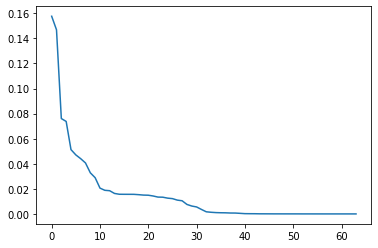

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

scl = StandardScaler()
pca = PCA()
clf = LogisticRegression(max_iter=100000, penalty='l2')
pipe = Pipeline(steps=[('Scale',scl),('PCA',pca),('LogReg',clf)])

pipe.fit(x_train,y_train)
plt.plot(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_)

y_pred = pipe.predict(x_test)

print(sklearn.metrics.classification_report(y_test,y_pred))

In [ ]:
scl = StandardScaler()
pca = PCA(n_components = 37)
clf = LogisticRegression(max_iter=100000, penalty='l2')
pipe = Pipeline(steps=[('Scale',scl),('PCA',pca),('LogReg',clf)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8240
           1       0.67      0.00      0.01       441

    accuracy                           0.95      8681
   macro avg       0.81      0.50      0.49      8681
weighted avg       0.94      0.95      0.92      8681



## Decision Trees 

Our dataset is split into two categories. Given our problem's classification nature, intuitively modelling using a decision tree is our next step. 

**First**, we will build a decision tree using all of our features and analyze its performance. We found out that while the precision for bankrupt companies has decreased about 20%, the recall has significantly improved from logistic regression. 

**Second**, to ensure our first decision tree is not over-fitted, we would use PCA to eliminate the features coincided with same correlation with identifying bankruptcy. 

**Third**, we will incorporate a grid search to fine tune the hyperparamters of the PCA (n_components) and decision tree (max_depth, criterion).  

### Simple Decision Tree


In [ ]:
from sklearn import tree 

#training step, on x_train and with y_train
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X=x_train, y=y_train)

#prediction step, with x_test and we will validate accuracy against y_test
prediction = clf.predict(x_test)

#test accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, prediction)
print("Accuracy: %.1f%%"% (accuracy*100))

#more comprehensive report 
print(sklearn.metrics.classification_report(y_test, prediction))

Accuracy: 94.9%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8240
           1       0.49      0.49      0.49       441

    accuracy                           0.95      8681
   macro avg       0.73      0.73      0.73      8681
weighted avg       0.95      0.95      0.95      8681



In [ ]:
#visualizing the tree 
test_representation = tree.export_text(clf)
print(test_representation )

In [ ]:
#visualizing the tree 
test_representation = tree.export_text(clf)
print(test_representation )

|--- feature_26 <= 1098.10
|   |--- feature_26 <= -1.41
|   |   |--- feature_55 <= 0.08
|   |   |   |--- feature_45 <= 0.52
|   |   |   |   |--- feature_20 <= 2.39
|   |   |   |   |   |--- feature_23 <= 0.50
|   |   |   |   |   |   |--- feature_57 <= 1.02
|   |   |   |   |   |   |   |--- feature_44 <= -0.58
|   |   |   |   |   |   |   |   |--- feature_63 <= 1.59
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_63 >  1.59
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 232.62
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_4 >  232.62
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_44 >  -0.58
|   |   |   |   |   |   |   |   |--- feature_40 <= -7.33
|   |   |   |   |   |   |   |   |   |--- feature_54 <= -4108.65
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_54 >  -4108.65
|   |  

###PCA Decision Tree 
Using a PCA enabled decision tree does not help with our model very very much. 

After few trial and error, implementing # components to 49 and maximum depth of the tree to 6 improves the precision of predicting bankrupt companies increases by 20%, but it comes with a trade-off of lower recall. 

In [ ]:
#initiate pca enabled dataset 
pca = PCA(n_components=49)
clf = tree.DecisionTreeClassifier(max_depth=6)

#create pipeline 
pipeline_steps = [('scale', StandardScaler()), ('pca', pca), ('decisiontree', clf)]
pipeline = Pipeline(pipeline_steps)
print(pipeline)

#prediction step, with x_test and we will validate accuracy against y_test
clf = pipeline.fit(x_train, y_train)
prediction = clf.predict(x_test)

#test accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, prediction)
print("Accuracy: %.1f%%"% (accuracy*100))

#more comprehensive report 
print(sklearn.metrics.classification_report(y_test,prediction))

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=49,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('decisiontree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=6,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='bes

###Decision tree with Grid Search
Instead of manully changing the parameters, in this section, we use a grid search to fine tune our hyper-paramters for our PCA decision tree. Our result is similar but slightly improved from manual tunning. Precision for bankrupt companies improved by 0.01 and recall improved by 0.01. Our f1-score for predicting bankruptcy improved by 0.01 as well. 

In [ ]:
# decision tree with grid search
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

x = bankrupt_data.drop(['bankrupt'], axis=1).values
y = bankrupt_data['bankrupt'].values

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

pipe = Pipeline(steps=[('sts_slc', std_slc), ('pca', pca), ('dec_tree', dec_tree)])

n_components = list(range(1, x.shape[1]+1, 1))
param_grid = {
    'pca__n_components': n_components,
    'dec_tree__criterion' : ['gini', 'entropy'], 
    'dec_tree__max_depth': [2, 4, 6, 8, 10, 12]
}


In [ ]:
clf_GS = GridSearchCV(pipe, param_grid)
clf_GS.fit(x, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sts_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('dec_tree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                             

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 6
Best Number Of Components: 61

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
# train the model with grid search tunned parameter 
pca = decomposition.PCA(n_components=61)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)

#create pipeline 
pipeline_steps = [('scale', StandardScaler()), ('pca', pca), ('decisiontree', clf)]
pipeline = Pipeline(pipeline_steps)
print(pipeline)

#prediction step, with x_test and we will validate accuracy against y_test
pred = pipeline.fit(x_train, y_train)
prediction = pred.predict(x_test)

#test accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, prediction)
print("Accuracy: %.1f%%"% (accuracy*100))

#more comprehensive report 
print(sklearn.metrics.classification_report(y_test,prediction))

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=61,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('decisiontree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=6,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='

## Random Forest
The logical next step from a single decision tree is multiple ones. In this section, we use a random forrest classification model to fit the train data, tuned via a grid search through the hyper-parameters of the model.

The improvement in the recall for bankrupt companies improved visibly, as around 1/3 of them are successfully identified within the test data set. And this improvement comes with little cost in precsision. Yet, in the grander scheme, the recall value is still very low to be truly useful. This indicates that the companies that this model predicts to have high risk would very likely to go bankrupt within 5 years, but the model also misses two-thirds of the eventually bankrupt firms.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 5, 10, 15],
    'n_estimators': [100, 140, 200],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [2, 4],
    'min_samples_leaf' : [1 , 3]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid)

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 140}

In [ ]:
rf_new = RandomForestClassifier(n_estimators = 140, max_depth = 15, criterion = 'gini', min_samples_split = 4)
rf_new.fit(x_train, y_train)
y_pred = rf_new.predict(x_test)

print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8240
           1       0.95      0.33      0.49       441

    accuracy                           0.97      8681
   macro avg       0.96      0.67      0.74      8681
weighted avg       0.96      0.97      0.96      8681



# Resampling & Refit

As demonstrated in EDA, there is a great imbalance between the two sets of companies in the dataset: the number of non-bankrupt companies far exceeds that of bankrupt ones. This is good news for Polish economy but bad news for data scientists. To address the issue, we next attemped to resample the train data set with Smote module and re-run some of the best-performing models 

## Oversampling
For both the logistic regression and the random forest model fitted to the blown up training set, we see a significant improvement in recall. However, this comes with great cost on the precision end, which droped by 39 and 62 percentage points repectively in thw two model. 

For the random forest model, we achieved 67% in recall rate, the highest by now, and its precision is 33%, visible yet not sufficient for practucal purposes.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

smote = SMOTE()
x_train1, y_train1 = smote.fit_resample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



### Decision Tree

In [ ]:
from sklearn import tree 
smote = SMOTE()
x_train1, y_train1 = smote.fit_resample(x_train,y_train)

#training step, on x_train and with y_train
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X=x_train1, y=y_train1)

#prediction step, with x_test and we will validate accuracy against y_test
prediction = clf.predict(x_test)

#test accuracy, ie Jaccard distance of matched items
accuracy = sklearn.metrics.accuracy_score(y_test, prediction)
print("Accuracy: %.1f%%"% (accuracy*100))

#more comprehensive report 
print(sklearn.metrics.classification_report(y_test, prediction))

Accuracy: 91.4%
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      8240
           1       0.31      0.56      0.40       441

    accuracy                           0.91      8681
   macro avg       0.64      0.74      0.67      8681
weighted avg       0.94      0.91      0.93      8681



### Random Forest

In [ ]:
param_grid = {
    'max_depth': [5, 10],
    'n_estimators': [100, 140],
    'criterion' : ['gini', 'entropy'],
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid)

grid_search.fit(x_train1, y_train1)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

In [ ]:
rf_new = RandomForestClassifier(n_estimators = 100, max_depth = 10, criterion = 'gini')
rf_new.fit(x_train1, y_train1)
y_pred = rf_new.predict(x_test)

print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      8240
           1       0.32      0.67      0.44       441

    accuracy                           0.91      8681
   macro avg       0.65      0.80      0.69      8681
weighted avg       0.95      0.91      0.93      8681



## OverSampling & UnderSampling Combined
We repeated the last section with a different resampling method, and received limited improvement in recall, again, at the cost of losing precision. The decision tree in this section performs worse than the simple decision tree.

In [ ]:
smoteenn = SMOTEENN()
x_train2, y_train2 = smoteenn.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



### Decision Tree

In [ ]:
#training step, on x_train and with y_train
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X=x_train2, y=y_train2)

#prediction step, with x_test and we will validate accuracy against y_test
prediction = clf.predict(x_test)

#test accuracy, ie Jaccard distance of matched items
accuracy = sklearn.metrics.accuracy_score(y_test, prediction)
print("Accuracy: %.1f%%"% (accuracy*100))

#more comprehensive report 
print(sklearn.metrics.classification_report(y_test, prediction))

Accuracy: 90.2%
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      8240
           1       0.29      0.63      0.40       441

    accuracy                           0.90      8681
   macro avg       0.63      0.77      0.67      8681
weighted avg       0.94      0.90      0.92      8681



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10],
    'n_estimators': [100, 140],
    'criterion' : ['gini', 'entropy'],
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid)

grid_search.fit(x_train2, y_train2)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 140}

In [ ]:
rf_new = RandomForestClassifier(n_estimators = 140, max_depth = 10, criterion = 'entropy')
rf_new.fit(x_train2, y_train2)
y_pred = rf_new.predict(x_test)

print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8240
           1       0.25      0.72      0.37       441

    accuracy                           0.87      8681
   macro avg       0.61      0.80      0.65      8681
weighted avg       0.95      0.87      0.90      8681



# Neural Network
Finally, after a few models with rather limited success, we decided to train a feedfoward neural network with pytorch to explore possible improvements. The number of layers and neurons in each layers are tuned manually.

The feedfoward neural network model achieved the highest recall across all of our models with a notably low precision. This model would be more suitable in situations where indentifying more companies in distress is more important than the precision.


##FNN

In [ ]:
!pip install torch torchvision

In [ ]:
import shutil
import torch
import torchvision
import torch.nn as nn
import torchsummary
from torchsummary import summary
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
bankrupt_data_nn = bankrupt_data
features = bankrupt_data_nn.drop(['bankrupt'], axis = 1)
label = bankrupt_data_nn['bankrupt']

features, test_features, label, test_label = train_test_split(features, label, test_size=0.2, random_state=42)


train_data = torch.tensor(np.stack([features[col].values for col in features.columns], 1), dtype = torch.float)
train_label = torch.tensor(label.values, dtype = torch.int)

test_data = torch.tensor(np.stack([test_features[col].values for col in test_features.columns], 1), dtype = torch.float)
test_label = torch.tensor(test_label.values, dtype = torch.int)


train_set = torch.utils.data.TensorDataset(train_data, train_label.long())
test_set = torch.utils.data.TensorDataset(test_data, test_label.long())

train_loader = DataLoader(train_set, 8, True)
test_loader = DataLoader(test_set, 1, False)

In [ ]:
criterion = nn.CrossEntropyLoss()

from torch.nn import functional
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

lr_model = LogisticRegression(64, 2)
lr_optimizer = torch.optim.Adam(lr_model.parameters(), lr=1e-4)

In [ ]:
def train_model(model, optimizer, criterion, epochs=10):
    for child in model.children():
        if hasattr(child, 'reset_parameters'):
            child.reset_parameters()
    model.train()
    model.to(device)

    final_training_accuracy = 0
    final_training_loss = 0
    loss_LIST = []
    accuracy_LIST = []

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for data, labels in train_loader:
            data = data.to(device)
            labels = labels.to(device)
    
            outputs = model(data)
            optimizer.zero_grad()

            _, predicted = torch.max(outputs.data, 1)

            loss = criterion(outputs, labels)
            loss.backward()
        
            optimizer.step()

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            running_loss += loss.item()
        loss_LIST.append(running_loss / len(train_loader))
        accuracy_LIST.append(correct/total)

        final_training_accuracy = accuracy_LIST[len(accuracy_LIST) - 1]    # TODO: Set this to final training accuracy
        final_training_loss = loss_LIST[len(loss_LIST) - 1]    # TODO: Set this to final testing accuracy

        print(final_training_accuracy)
        print(final_training_loss)
    return final_training_loss, final_training_accuracy, loss_LIST, accuracy_LIST

In [ ]:
fnn_model = torch.nn.Sequential(
  nn.Linear(64, 16),
  nn.ReLU(),
  nn.Linear(16, 8),
  nn.ReLU(),
  nn.Linear(8, 4),
  nn.ReLU(),
  nn.Linear(4, 2)
)

In [ ]:
fnn_loss_list = []
fnn_accuracy_list = []
fnn_epochs =20           # TODO: set the number of epochs
fnn_optimizer = torch.optim.Adam(fnn_model.parameters(), 1e-4)            # TODO: initialize the optimizer
fnn_training_loss, fnn_training_accuracy, fnn_loss_list, fnn_accuracy_list = train_model(fnn_model, fnn_optimizer, criterion, fnn_epochs)

print("Feedforward Neural Network - the training loss is ", str(fnn_training_loss))
print("Feedforward Neural Network - the training accuracy is ", str(fnn_training_accuracy))

0.8763967284875014
6.39941249765994
0.9361536689321507
1.5478620786891175
0.9369600276465845
0.8492586295174985
0.9398686787236493
1.0701674031623767
0.9413950005759705
1.0518351441031708
0.9440732634489114
0.7763396956942135
0.9471547056790692
0.5302538409826739
0.9489402142610298
0.5101786185283063
0.9491706024651538
0.39758557498054287
0.9504953346388665
0.3947171212023927
0.9515896786084552
0.30145759553035156
0.9512440963022694
0.2941129426294893
0.9509561110471144
0.29640864611527584
0.9522520446953116
0.3095094201021884
0.952568828475982
0.254308503925881
0.952741619629075
0.23461287368652775
0.9522808432208271
0.22267433083505708
0.9514456859808778
0.20972293960795138
0.9522520446953116
0.19641638640657605
0.9524248358484045
0.19125172711562977
Feedforward Neural Network - the training loss is  0.19125172711562977
Feedforward Neural Network - the training accuracy is  0.9524248358484045


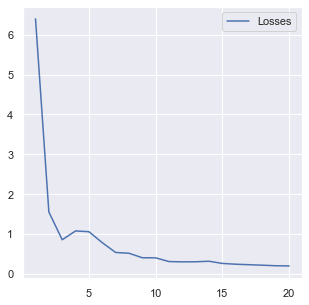

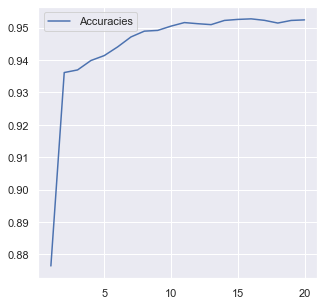

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
plt.plot(range(1,21), fnn_loss_list, label="Losses")
plt.legend()
plt.show()
plt.plot(range(1,21), fnn_accuracy_list, label="Accuracies")
plt.legend()
plt.show()

In [ ]:
def test_model(model, criterion):
    model.eval()
    running_loss = 0.0
    total = 0
    correct = 0
    
    confusion_matrix = torch.zeros(2, 2)

    # TODO: Implement your testing loop with the `test_loader` data
    for data, labels in test_loader:
        data = torch.flatten(data, 1)
        data = data.to(device)
        labels = labels.to(device)

        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        
        for t, p in zip(labels.view(-1), predicted.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

        loss = criterion(outputs, labels)

        running_loss = loss.item() / len(test_loader)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    testing_loss = running_loss  # TODO: Set this to your testing loss
    testing_accuracy = correct/total     # TODO: Set this to your testing accuracy
    return  testing_loss, testing_accuracy, confusion_matrix 

In [ ]:
fnn_testing_loss, fnn_testing_accuracy, fnn_confusion_maxtrix = test_model(fnn_model, criterion)

cm = np.array(fnn_confusion_maxtrix)

print("Feedforward Neural Network - the testing loss is ", str(fnn_testing_loss))
print("Feedforward Neural Network - the testing accuracy is ", str(fnn_testing_accuracy))
print("Feedforward Neural Network - the testing recall is ", str(cm[1][1] / (cm[1][0]+cm[1][1])))
print("Feedforward Neural Network - the testing precision is ", str(cm[1][1] / (cm[0][1]+cm[1][1])))
print("Feedforward Neural Network - the testing confusion matrix is ")
print(cm)

Feedforward Neural Network - the testing loss is  3.002206130300218e-06
Feedforward Neural Network - the testing accuracy is  0.9485082363782974
Feedforward Neural Network - the testing recall is  0.01814059
Feedforward Neural Network - the testing precision is  0.36363637
Feedforward Neural Network - the testing confusion matrix is 
[[8.226e+03 1.400e+01]
 [4.330e+02 8.000e+00]]


## FNN with Resampling

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek


bankrupt_data_nn = bankrupt_data_new
features = bankrupt_data_nn.drop(['bankrupt'], axis = 1)
label = bankrupt_data_nn['bankrupt']

features, test_features, label, test_label = train_test_split(features, label, test_size=0.2, random_state=42)

smote = SMOTE()
features, label = smote.fit_resample(features,label)


train_data = torch.tensor(np.stack([features[col].values for col in features.columns], 1), dtype = torch.float)
train_label = torch.tensor(label.values, dtype = torch.int)

test_data = torch.tensor(np.stack([test_features[col].values for col in test_features.columns], 1), dtype = torch.float)
test_label = torch.tensor(test_label.values, dtype = torch.int)


train_set = torch.utils.data.TensorDataset(train_data, train_label.long())
test_set = torch.utils.data.TensorDataset(test_data, test_label.long())

train_loader = DataLoader(train_set, 8, True)
test_loader = DataLoader(test_set, 1, False)

In [ ]:
fnn_loss_list = []
fnn_accuracy_list = []
fnn_epochs =20           # TODO: set the number of epochs
fnn_optimizer = torch.optim.Adam(fnn_model.parameters(), 1e-4)            # TODO: initialize the optimizer
fnn_training_loss, fnn_training_accuracy, fnn_loss_list, fnn_accuracy_list = train_model(fnn_model, fnn_optimizer, criterion, fnn_epochs)

print("Feedforward Neural Network - the training loss is ", str(fnn_training_loss))
print("Feedforward Neural Network - the training accuracy is ", str(fnn_training_accuracy))

0.6438743423837455
3.692077180267776
0.681139263469795
2.543106355936832
0.6927798270544839
2.157566242752542
0.7084870290862914
1.8100691903363393
0.6993257543689907
1.7521303197343525
0.6859013122089859
1.3526605743793654
0.6876398379391667
1.4546271728040634
0.7113140230997158
1.2086318227440958
0.72904698554756
1.113576356332836
0.7237255850517023
0.9420402956382476
0.7389943762472032
0.6528700391610699
0.7449960694200883
0.5914559661197769
0.7557749289472093
0.5562752977154148
0.7624871500272117
0.5492082327993537
0.7662363185583843
0.5418268811340156
0.7670224345407268
0.5338879562180036
0.770348309850638
0.5177032341348288
0.7740974783818105
0.5116625040984021
0.7722833645764045
0.5111170912972167
0.7751103585898289
0.5023998708120352
Feedforward Neural Network - the training loss is  0.5023998708120352
Feedforward Neural Network - the training accuracy is  0.7751103585898289


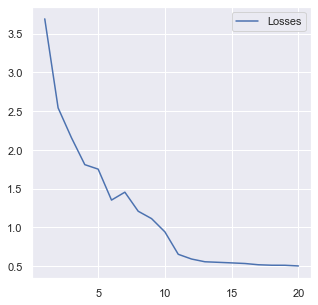

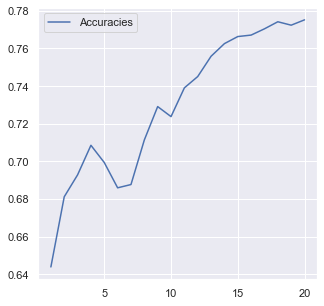

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
plt.plot(range(1,21), fnn_loss_list, label="Losses")
plt.legend()
plt.show()
plt.plot(range(1,21), fnn_accuracy_list, label="Accuracies")
plt.legend()
plt.show()

In [ ]:
fnn_testing_loss, fnn_testing_accuracy, fnn_confusion_maxtrix = test_model(fnn_model, criterion)

cm = np.array(fnn_confusion_maxtrix)

print("Feedforward Neural Network - the testing loss is ", str(fnn_testing_loss))
print("Feedforward Neural Network - the testing accuracy is ", str(fnn_testing_accuracy))
print("Feedforward Neural Network - the testing recall is ", str(cm[1][1] / (cm[1][0]+cm[1][1])))
print("Feedforward Neural Network - the testing precision is ", str(cm[1][1] / (cm[0][1]+cm[1][1])))
print("Feedforward Neural Network - the testing confusion matrix is ")
print(cm)

Feedforward Neural Network - the testing loss is  4.7325195250917915e-08
Feedforward Neural Network - the testing accuracy is  0.7469185577698422
Feedforward Neural Network - the testing recall is  0.75736964
Feedforward Neural Network - the testing precision is  0.13778877
Feedforward Neural Network - the testing confusion matrix is 
[[6150. 2090.]
 [ 107.  334.]]


#Conclusion
Through our various efforts to explore the relationships between the financial data and the likelihood of bankrupcy for firms, we have learned the complex nature of the problem. Even though we have as many as 64 feature to work with, the inherent imbalance of the data and diverse causes of bankrupcy in real life made it very difficult to construct a satisfactory model. It seems that we have to make a precision-recall trade-off when selecting models to use. The following chart detailed three of the best performing models we've constructed for this project:
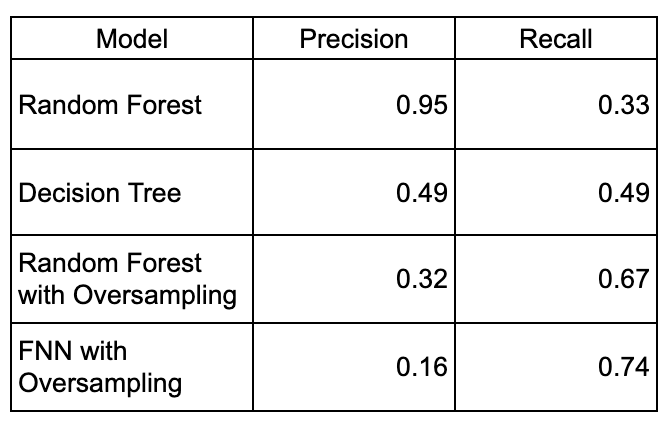

The simple random forest model offers the highest precision with low recall, while the feedfoward neural network model with resampling is the exact opposite. The simple decision tree model and the random forest model are relatively more balanced in the two measure. Comparing with Altman's Z-score formula (and ours), any one of the models would be a better predictor by both measures.

In light of the complexity of the issue, we think that potential next steps include obtaining a more complete set of features that not only capture the financial aspect of a firm, but also more infomation on their industry, management, nationality, and more. After separating firms with drastically different business models, for instance, asset-light internet companies and asset-heavy real estate companies, we believe we would be able to develop more preciese and accurate models for each sub-category of companies.

